
#Módulo 4# 
#Funcionários da Companhia Milsa#

- A companhia Milsa possui dados de 36 funcionários da seção de orçamentos. Para
cada funcionário temos os seguintes atributos: estado civil, instrução de educação,
filhos,salário, idade (anos e meses), região. A imagem a seguir mostra o exemplo de
dados de 5 destes funcionários.
<br>

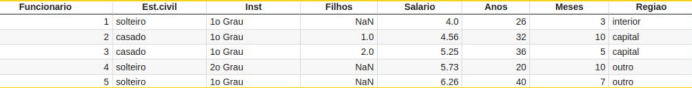
<br>

- A empresa deseja saber algumas informações sobre esses dados e solicitou que você
fizesse uma análise detalhada em um notebook. O notebook precisa estar bem
estruturado e com markdowns explicando cada insight encontrado.
Leia o dataset e realize uma análise sabendo das seguintes questões que precisam
ser levadas em conta…

<br>
O que se pede: <br>
■ Primeiramente, coloque a coluna Funcionário como índice; <br>
■ Saiba que a coluna meses não é necessária para a análise e deve ser retirada; <br>
■ Qual a média de idade dos funcionários? <br>
■ Dos funcionários, com filhos, qual o número mais comum? <br>
■ Qual a média e a mediana dos salários dos funcionários? O que esses valores
podem indicar? <br>
■ Quais são os tipos de instrução existentes? <br>
■ Qual a média de salário e idade das pessoas casadas? <br>
■ Qual o funcionário que possui maior salário (informe seus atributos)? <bt>
■ Qual o funcionário que possui menor idade (informe seus atributos)? <br>
■ Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem
instrução de 2o grau? <br>
■ Faça uma correlação entre todos os atributos. (Dica: mapeie os atributos
qualitativos para atributos quantitativos. Ex: solteiro: 1, casado: 2, etc). <br>
■ Forneça pelo menos mais 3 informações que você achar interessante. <br>




In [ ]:
import pandas as pd

dados = {'Funcionário' : [1,2,3,4,5], 'Est. Cívil' : ['solteiro', 'casado','casado', 'solteiro','solteiro' ], 'Inst.' : ['1o grau', '1o grau', '1o grau', '2o grau','1o grau'], 
         'Filhos' : ['NaN',1,2,'NaN','NaN'], 'Salário' : [4,4.56,5.25,5.73,6.26], 'Anos' : [26,32,36,20,40], 'Meses' : [3,10,5,10,7], 'Região' : ['interior','capital','capital','outro','outro']}
#criação do dicionário com os dados

df = pd.DataFrame(dados)
df

,Funcionário,Est. Cívil,Inst.,Filhos,Salário,Anos,Meses,Região
0,1,solteiro,1o grau,NaN,4.00,26,3,interior
1,2,casado,1o grau,1,4.56,32,10,capital
2,3,casado,1o grau,2,5.25,36,5,capital
3,4,solteiro,2o grau,NaN,5.73,20,10,outro
4,5,solteiro,1o grau,NaN,6.26,40,7,outro


In [ ]:
#Primeiramente, coloque a coluna Funcionário como índice;
df = df.set_index('Funcionário')
df

,Est. Cívil,Inst.,Filhos,Salário,Anos,Meses,Região
Funcionário,,,,,,,
1,solteiro,1o grau,NaN,4.00,26,3,interior
2,casado,1o grau,1,4.56,32,10,capital
3,casado,1o grau,2,5.25,36,5,capital
4,solteiro,2o grau,NaN,5.73,20,10,outro
5,solteiro,1o grau,NaN,6.26,40,7,outro


In [ ]:
#Saiba que a coluna meses não é necessária para a análise e deve ser retirada;
df = df.drop('Meses', axis = 1)
df

,Est. Cívil,Inst.,Filhos,Salário,Anos,Região
Funcionário,,,,,,
1,solteiro,1o grau,NaN,4.00,26,interior
2,casado,1o grau,1,4.56,32,capital
3,casado,1o grau,2,5.25,36,capital
4,solteiro,2o grau,NaN,5.73,20,outro
5,solteiro,1o grau,NaN,6.26,40,outro


In [ ]:
#Qual a média de idade dos funcionários?
df['Anos'].mean()


30.8

In [ ]:
#Dos funcionários, com filhos, qual o número mais comum?
print(df['Filhos'].mode())

0    NaN
Name: Filhos, dtype: object


In [ ]:
#Qual a média e a mediana dos salários dos funcionários? O que esses valores podem indicar?
l = df['Salário'].mean()
z = df['Salário'].median()
print('A média é:\n', l, '\nA mediana é:\n',z)
#esses valores podem indicar o sálario médio da empresa e o salário que tem maior equilibrio (nem alto e nem baixo)

A média é:
 5.159999999999999 
A mediana é:
 5.25


In [ ]:
#Quais são os tipos de instrução existentes?
print(df['Inst.'].unique())

['1o grau' '2o grau']


In [ ]:
#Qual a média de salário e idade das pessoas casadas?
s = df.loc[df['Est. Cívil'] == 'casado', 'Salário'].mean()
idade = df.loc[df['Est. Cívil'] == 'casado', 'Anos'].mean()
print('A média das idades das pessoas casadas é:\n', idade, '\nA média dos salários é:\n', s)

A média das idades das pessoas casadas é:
 34.0 
A média dos salários é:
 4.904999999999999


In [ ]:
#Qual o funcionário que possui maior salário (informe seus atributos)?
w = df['Salário'].idxmax()
df.loc[w]

Est. Cívil    solteiro
Inst.          1o grau
Filhos             NaN
Salário           6.26
Anos                40
Região           outro
Name: 5, dtype: object

In [ ]:
#Qual o funcionário que possui menor idade (informe seus atributos)?
p = df['Anos'].idxmax()
df.loc[p]

Est. Cívil    solteiro
Inst.          1o grau
Filhos             NaN
Salário           6.26
Anos                40
Região           outro
Name: 5, dtype: object

In [ ]:
#Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?
df[(df['Anos'] <= 35) &
   (df['Região'] == 'capital') &
   (df['Inst.'] == '2o grau')]

,Est. Cívil,Inst.,Filhos,Salário,Anos,Região
Funcionário,,,,,,


In [ ]:
#Faça uma correlação entre todos os atributos. 
#(Dica: mapeie os atributos qualitativos para atributos quantitativos. Ex: solteiro: 1, casado: 2, etc).
#Sem ideia!!!

In [ ]:
#Forneça pelo menos mais 3 informações que você achar interessante.
df['Inst.'].count()   # contanto qualquer parâmetro, podemos conferir a quantidade total de funcionários.

5

In [ ]:
df[df['Est. Cívil'] == 'casado']  # mostra os funcionários casados e suas informações

,Est. Cívil,Inst.,Filhos,Salário,Anos,Região
Funcionário,,,,,,
2,casado,1o grau,1,4.56,32,capital
3,casado,1o grau,2,5.25,36,capital


In [ ]:
df[df['Região'] == 'interior']  # mostra os funcionários que moram no interior e suas informações

,Est. Cívil,Inst.,Filhos,Salário,Anos,Região
Funcionário,,,,,,
1,solteiro,1o grau,NaN,4.0,26,interior
